## Analyze trained models

In this notebook I want to perform the analysis of the DSF models, trained on four datasets.

### Note

The following analysis is just a placeholder, because the models here were trained on shitty data.

Firstly, I will load the files, that were created at the process of training. They contain MSE (Mean Squared Error) loss on the training set and Pearson correlation coefficients between true and predicted scores on the training set.

In [8]:
import numpy as np

loss_drugcomb = np.load('data-drugcomb-fi/result/epoch_200_1/loss.npy')
pearson_drugcomb = np.load('data-drugcomb-fi/result/epoch_200_1/pearson.npy')

loss_drugcombDB = np.load('data-DrugCombDB/result/epoch_200/loss.npy')
pearson_drugcombDB = np.load('data-DrugCombDB/result/epoch_200/pearson.npy')

loss_nci = np.load('data-nci/result/epoch_200_1/loss.npy')
pearson_nci = np.load('data-nci/result/epoch_200_1/pearson.npy')

loss_oneil = np.load('data-oneil/result/epoch_200/loss.npy')
pearson_oneil = np.load('data-oneil/result/epoch_200/pearson.npy')

Then, I visualize the statistics from the files.

In [9]:
import matplotlib.pyplot as plt

def plot_stats(loss, pearson):
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, marker='o')
    plt.title('Training Loss per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(epochs, pearson, marker='o', color='orange')
    plt.title('Training Pearson Correlation per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')

    plt.tight_layout()
    plt.show()

### DrugComb dataset

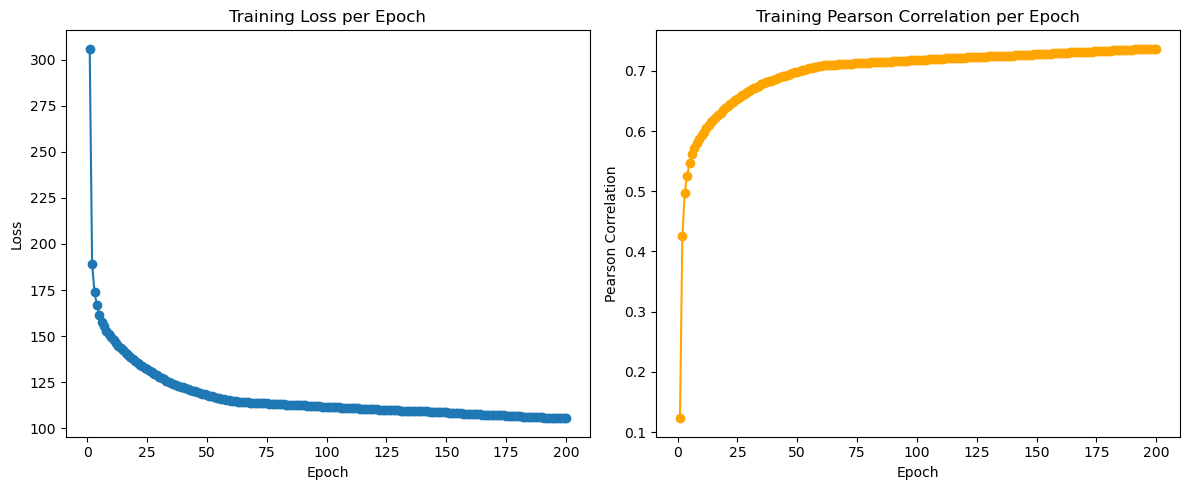

In [10]:
plot_stats(loss_drugcomb, pearson_drugcomb)

### NCI dataset

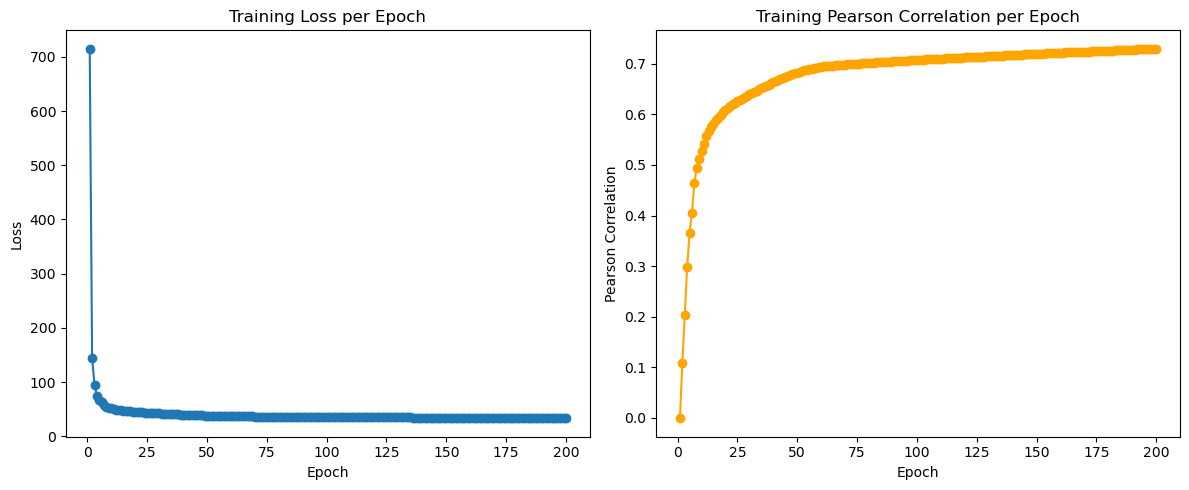

In [11]:
plot_stats(loss_nci, pearson_nci)

### O-Neil dataset

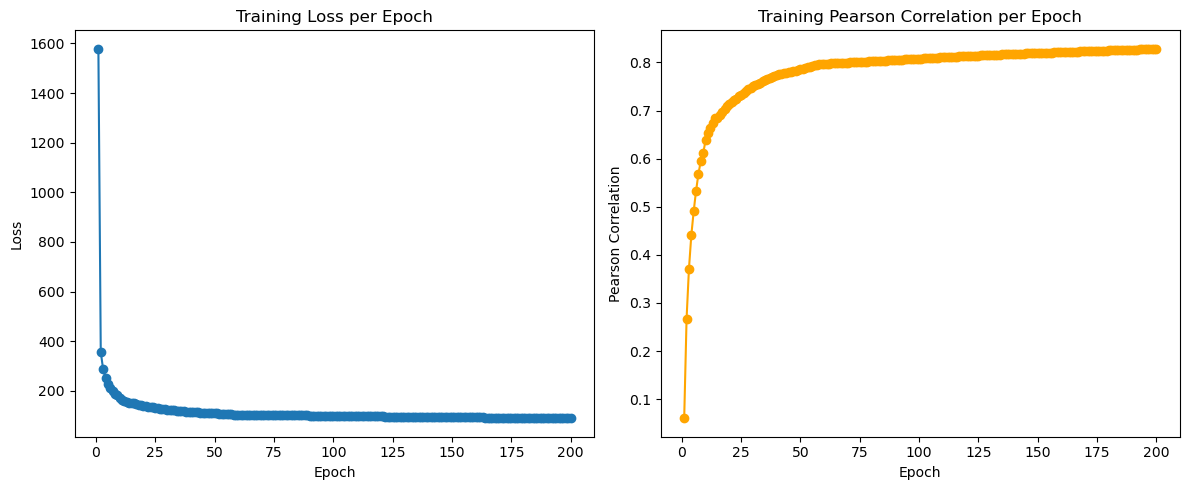

In [12]:
plot_stats(loss_oneil, pearson_oneil)